In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load and Visualize CIFAR-10 Dataset

In [25]:
import os, pickle

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
    return X, Y

def load_cifar10(path):
    xs = []
    ys = []
    
    for i in range(1, 6):
        batch_filename = os.path.join(path, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(batch_filename)
        xs.append(X)
        ys.append(Y)
    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    Xte, Yte = load_cifar10_batch(os.path.join(path, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ssvakil","key":"77365af4dd1f8a6c5248865fc371e28e"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d janzenliu/cifar-10-batches-py

 85% 138M/162M [00:01<00:00, 115MB/s]
100% 162M/162M [00:01<00:00, 139MB/s]


In [7]:
ls

cifar-10-batches-py.zip  kaggle.json  sample_data/


In [8]:
!mkdir cifar-10-batches-py

In [13]:
cd cifar-10-batches-py

/content/cifar-10-batches-py


In [20]:
ls

batches.meta             data_batch_1  data_batch_4  readme.html
cifar-10-batches-py/     data_batch_2  data_batch_5  sample_data/
cifar-10-batches-py.zip  data_batch_3  kaggle.json   test_batch


In [12]:
cp cifar-10-batches-py.zip cifar-10-batches-py


In [19]:
from zipfile import ZipFile
file_name="cifar-10-batches-py.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [18]:
ls

cifar-10-batches-py/  cifar-10-batches-py.zip  kaggle.json  sample_data/


In [17]:
!pwd

/content


In [22]:
ls


batches.meta             data_batch_1  data_batch_4  readme.html
cifar-10-batches-py/     data_batch_2  data_batch_5  sample_data/
cifar-10-batches-py.zip  data_batch_3  kaggle.json   test_batch


In [26]:
X_train, y_train, X_test, y_test = load_cifar10('cifar-10-batches-py')

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [32]:
!mkdir -p ~/.cifar-10-batches-py

In [33]:
ls


batches.meta             data_batch_2  data_batch_5  sample_data/
cifar-10-batches-py.zip  data_batch_3  kaggle.json   test_batch
data_batch_1             data_batch_4  readme.html


In [27]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train = X_train.reshape((n_train, -1))
X_test = X_test.reshape((n_test, -1))

print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


# Preprocess Data

In [28]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train -= mu
X_train /= sigma
X_test -= mu
X_test /= sigma

# print(np.mean(X_train, axis=0))
# print(np.std(X_train, axis=1))

# Using `sklearn` to classify data

In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(verbose=True, early_stopping=True)

In [30]:
clf.fit(X_train, y_train)

Iteration 1, loss = 1.85080890
Validation score: 0.442200
Iteration 2, loss = 1.54804335
Validation score: 0.459000
Iteration 3, loss = 1.41867159
Validation score: 0.467000
Iteration 4, loss = 1.33819329
Validation score: 0.479000
Iteration 5, loss = 1.28432205
Validation score: 0.483000
Iteration 6, loss = 1.24590146
Validation score: 0.494400
Iteration 7, loss = 1.20552182
Validation score: 0.489400
Iteration 8, loss = 1.17495395
Validation score: 0.485200
Iteration 9, loss = 1.13868093
Validation score: 0.502800
Iteration 10, loss = 1.12106056
Validation score: 0.495600
Iteration 11, loss = 1.08866195
Validation score: 0.486000
Iteration 12, loss = 1.06816741
Validation score: 0.498200
Iteration 13, loss = 1.04729511
Validation score: 0.492400
Iteration 14, loss = 1.01828665
Validation score: 0.502800
Iteration 15, loss = 0.99827581
Validation score: 0.498600
Iteration 16, loss = 0.98268933
Validation score: 0.496400
Iteration 17, loss = 0.96476010
Validation score: 0.492600
Iterat

MLPClassifier(early_stopping=True, verbose=True)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("Accuracy on Train data = %.2f" % train_accuracy)
print("Accuracy on Test data = %.2f" % test_accuracy)

Accuracy on Train data = 0.69
Accuracy on Test data = 0.50


In [33]:
print(confusion_matrix(y_test, y_pred))

[[557  37  87  17  26  15  35  23 135  68]
 [ 34 583  19  29  13   8  30  18  86 180]
 [ 82  19 420  90 114  61  91  80  19  24]
 [ 45  31  83 318  67 180 135  67  29  45]
 [ 73  13 128  86 378  54 110 113  32  13]
 [ 22  15  84 244  70 343  70  90  29  33]
 [ 20  24  85 105  63  40 589  35  17  22]
 [ 47  10  54  70  62  69  26 597  13  52]
 [100  62  28  22  20  12  12  11 659  74]
 [ 49 168  22  33   8  13  29  42  47 589]]


## Fine Tune Hyper-Parameters 

In [34]:
clf2 = MLPClassifier(hidden_layer_sizes=(500, 100), 
                     alpha=0.05, 
                     batch_size=2000,
                     solver='sgd',
                     learning_rate='adaptive', 
                     learning_rate_init=0.05,
                     early_stopping=True,
                     verbose=True)

In [35]:
clf2.fit(X_train, y_train)

Iteration 1, loss = 1.99139560
Validation score: 0.404000
Iteration 2, loss = 1.59883846
Validation score: 0.447600
Iteration 3, loss = 1.46597867
Validation score: 0.474000
Iteration 4, loss = 1.37673311
Validation score: 0.490600
Iteration 5, loss = 1.29039257
Validation score: 0.492000
Iteration 6, loss = 1.23088515
Validation score: 0.493800
Iteration 7, loss = 1.16429905
Validation score: 0.488800
Iteration 8, loss = 1.11705644
Validation score: 0.493600
Iteration 9, loss = 1.06050646
Validation score: 0.478000
Iteration 10, loss = 1.00399868
Validation score: 0.485000
Iteration 11, loss = 0.98079562
Validation score: 0.507200
Iteration 12, loss = 0.92904908
Validation score: 0.516200
Iteration 13, loss = 0.86208502
Validation score: 0.515600
Iteration 14, loss = 0.81621454
Validation score: 0.510600
Iteration 15, loss = 0.78146424
Validation score: 0.491400
Iteration 16, loss = 0.75275759
Validation score: 0.479400
Iteration 17, loss = 0.74215755
Validation score: 0.505400
Iterat

MLPClassifier(alpha=0.05, batch_size=2000, early_stopping=True,
              hidden_layer_sizes=(500, 100), learning_rate='adaptive',
              learning_rate_init=0.05, solver='sgd', verbose=True)

In [36]:
y_pred = clf2.predict(X_test)

print("Accuracy on train data = %.2f" % accuracy_score(y_train, clf2.predict(X_train)))
print("Accuracy on test data  = %.2f" % accuracy_score(y_test, y_pred))

Accuracy on train data = 0.91
Accuracy on test data  = 0.53


## Results

### Correct predictions

In [37]:
X_test = sigma * X_test + mu

In [38]:
correct_idx = np.arange(10000)[y_test == y_pred]
print(correct_idx[:10])

[ 0  1  5  6  7  9 10 11 12 13]


In [39]:
correct_samples_idx = np.random.choice(correct_idx, 10, replace=False)

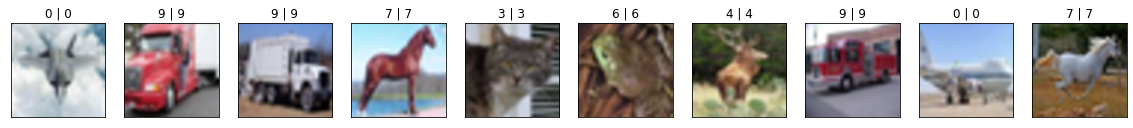

In [40]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(correct_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])

### incorrect predictions 

In [41]:
incorrect_idx = np.arange(10000)[y_test != y_pred]
incorrect_samples_idx = np.random.choice(incorrect_idx, 10, replace=False)

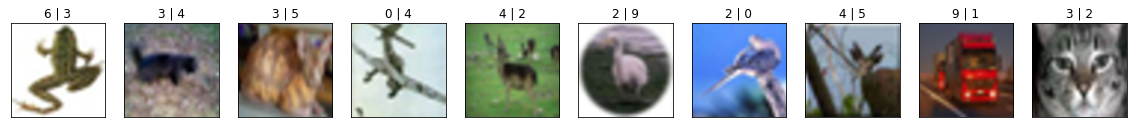

In [42]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(incorrect_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])